In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

Data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
Data


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [3]:
Data.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [4]:
#cleaning up
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') #is it 11:20 or 14:20 or smth else? 

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows





def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


## Total accidents


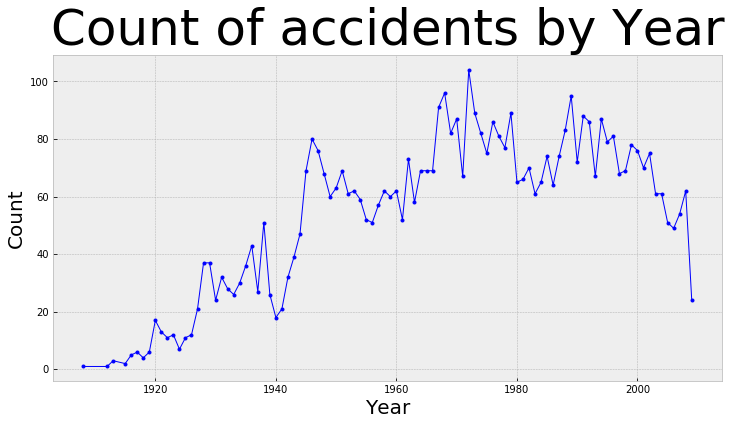

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5
1917,6
1918,4
1919,6
1920,17


In [17]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
#
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='Blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Count of accidents by Year', loc='Center', fontsize=50)
plt.show()
@Temp

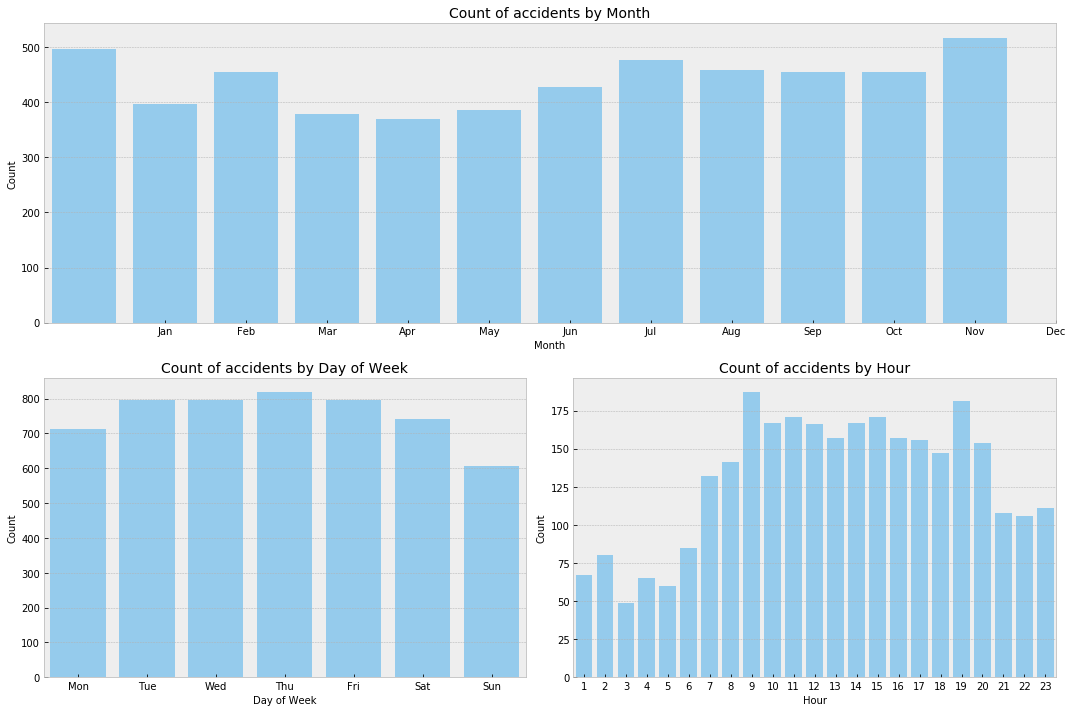

In [6]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

## Military vs Passenger flights

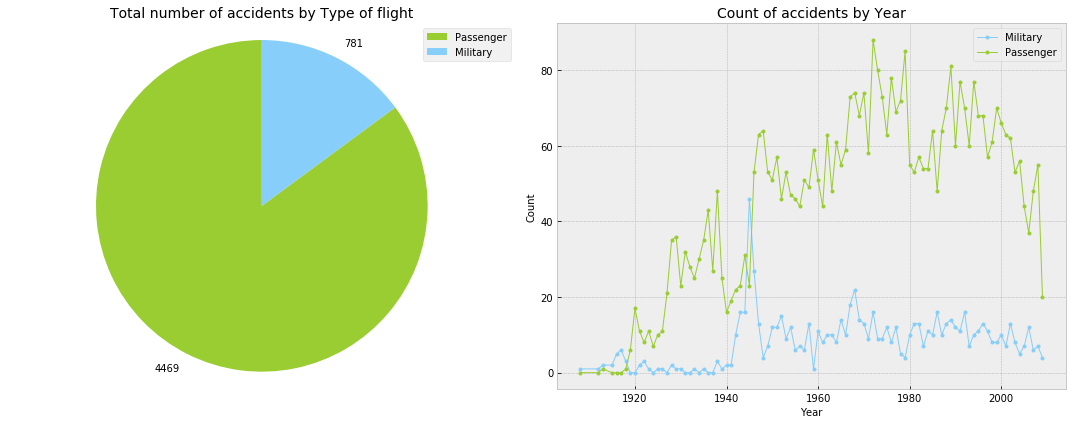

In [7]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = Data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [9]:
Data['year'] = Data['Date'].dt.year

In [10]:
Data['year'].head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: year, dtype: int64

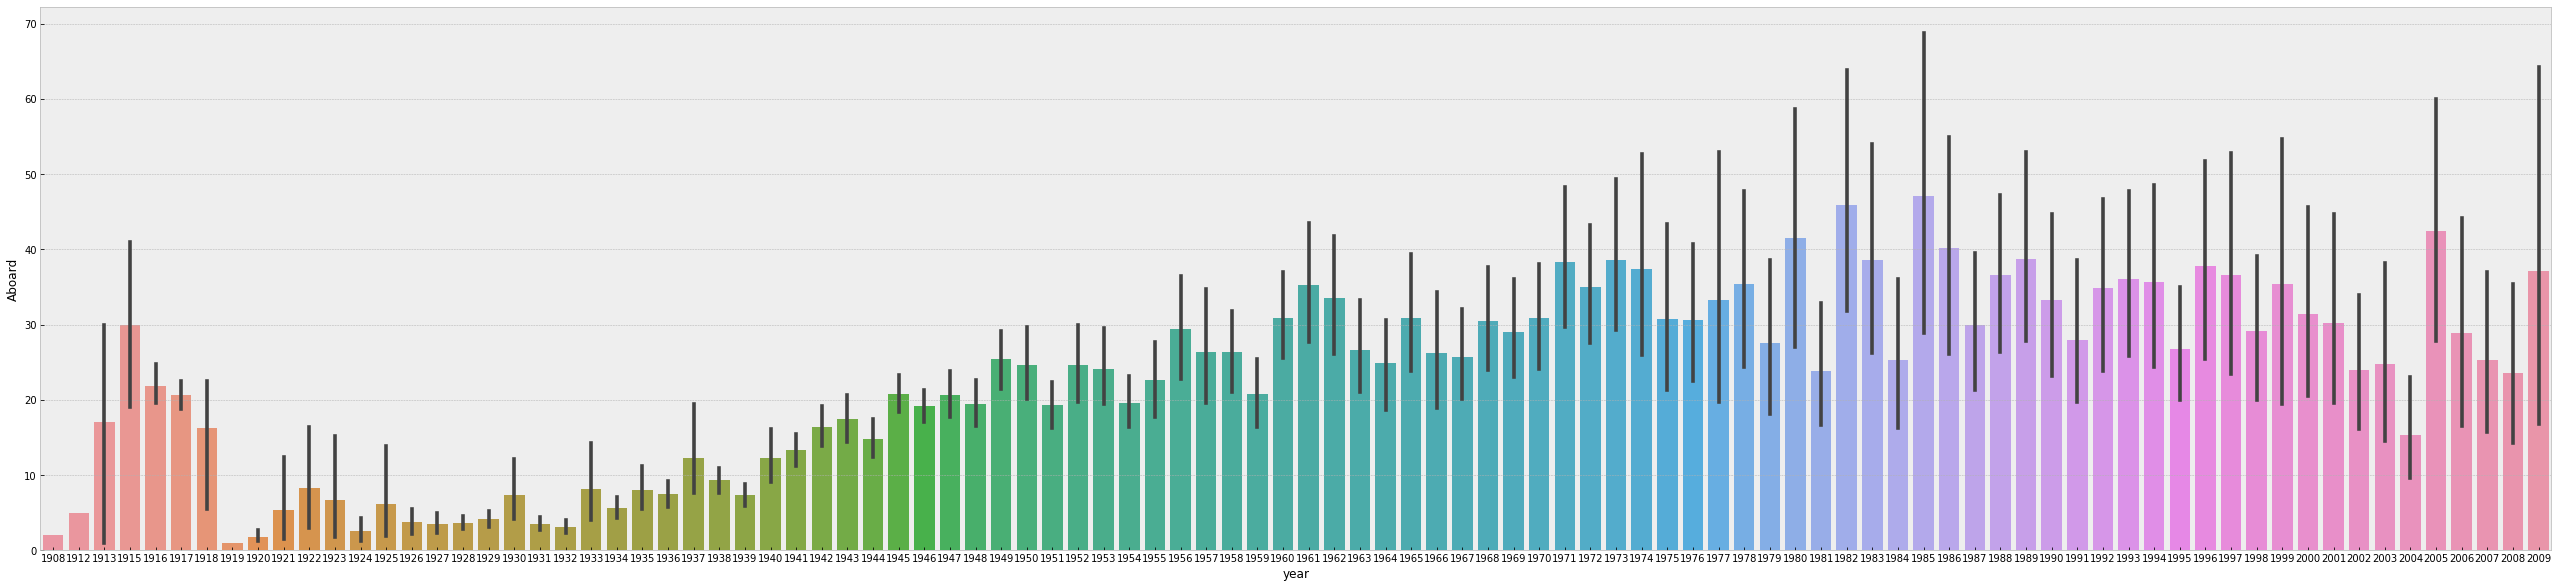

In [11]:
plt.figure(figsize=(45,10))
sns.barplot('year','Aboard',data=Data)

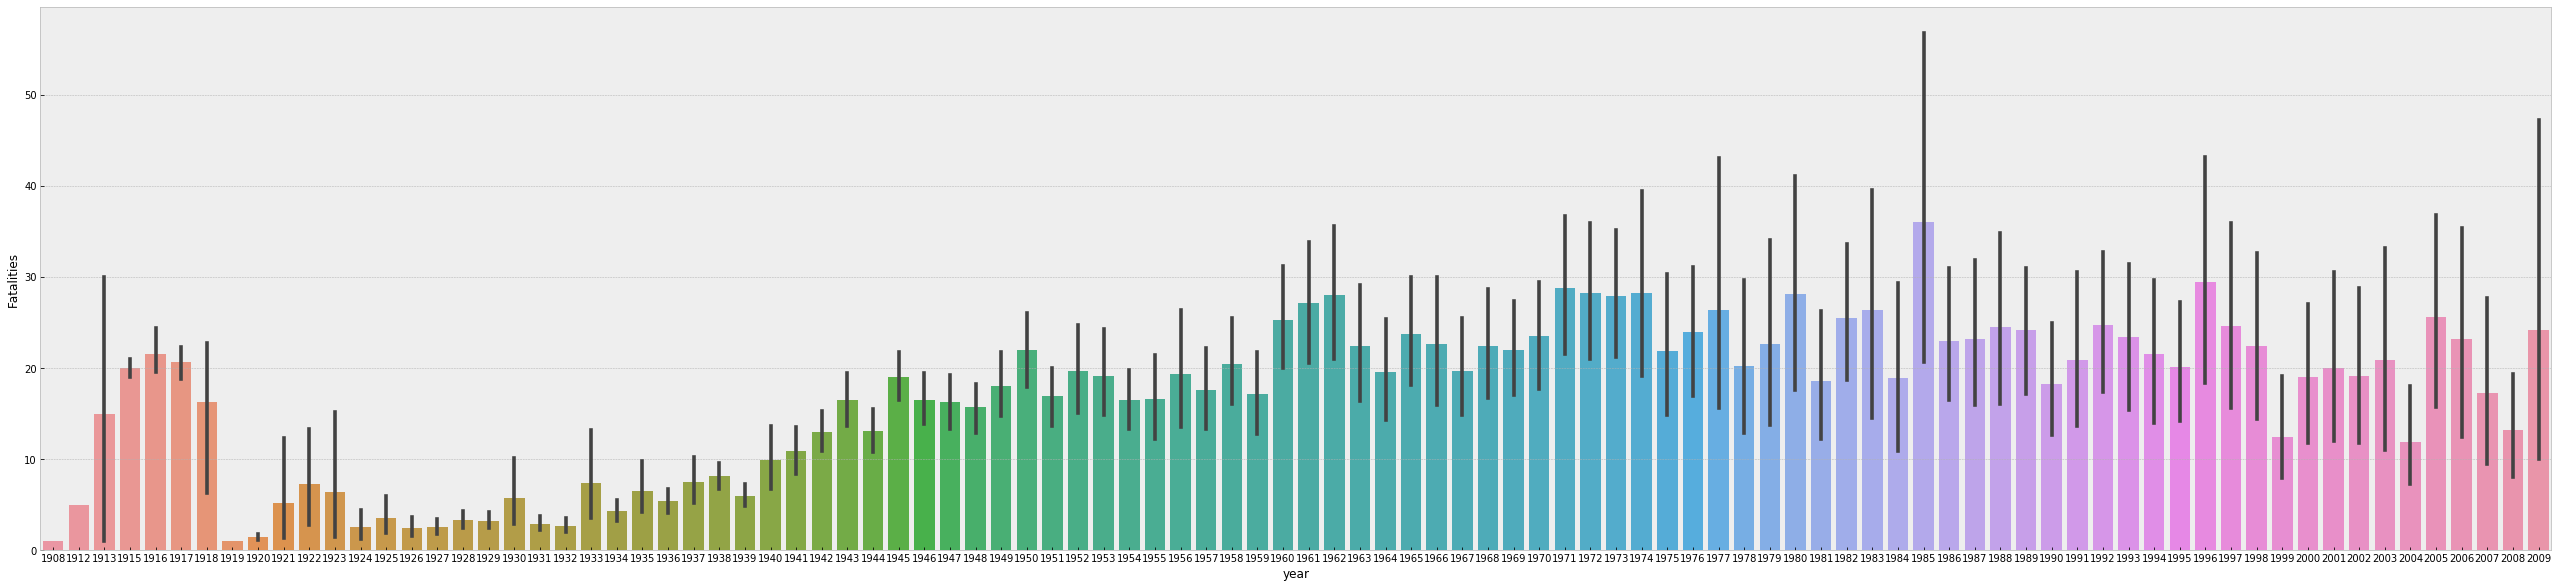

In [12]:
plt.figure(figsize=(45,10))
sns.barplot('year','Fatalities',data=Data)

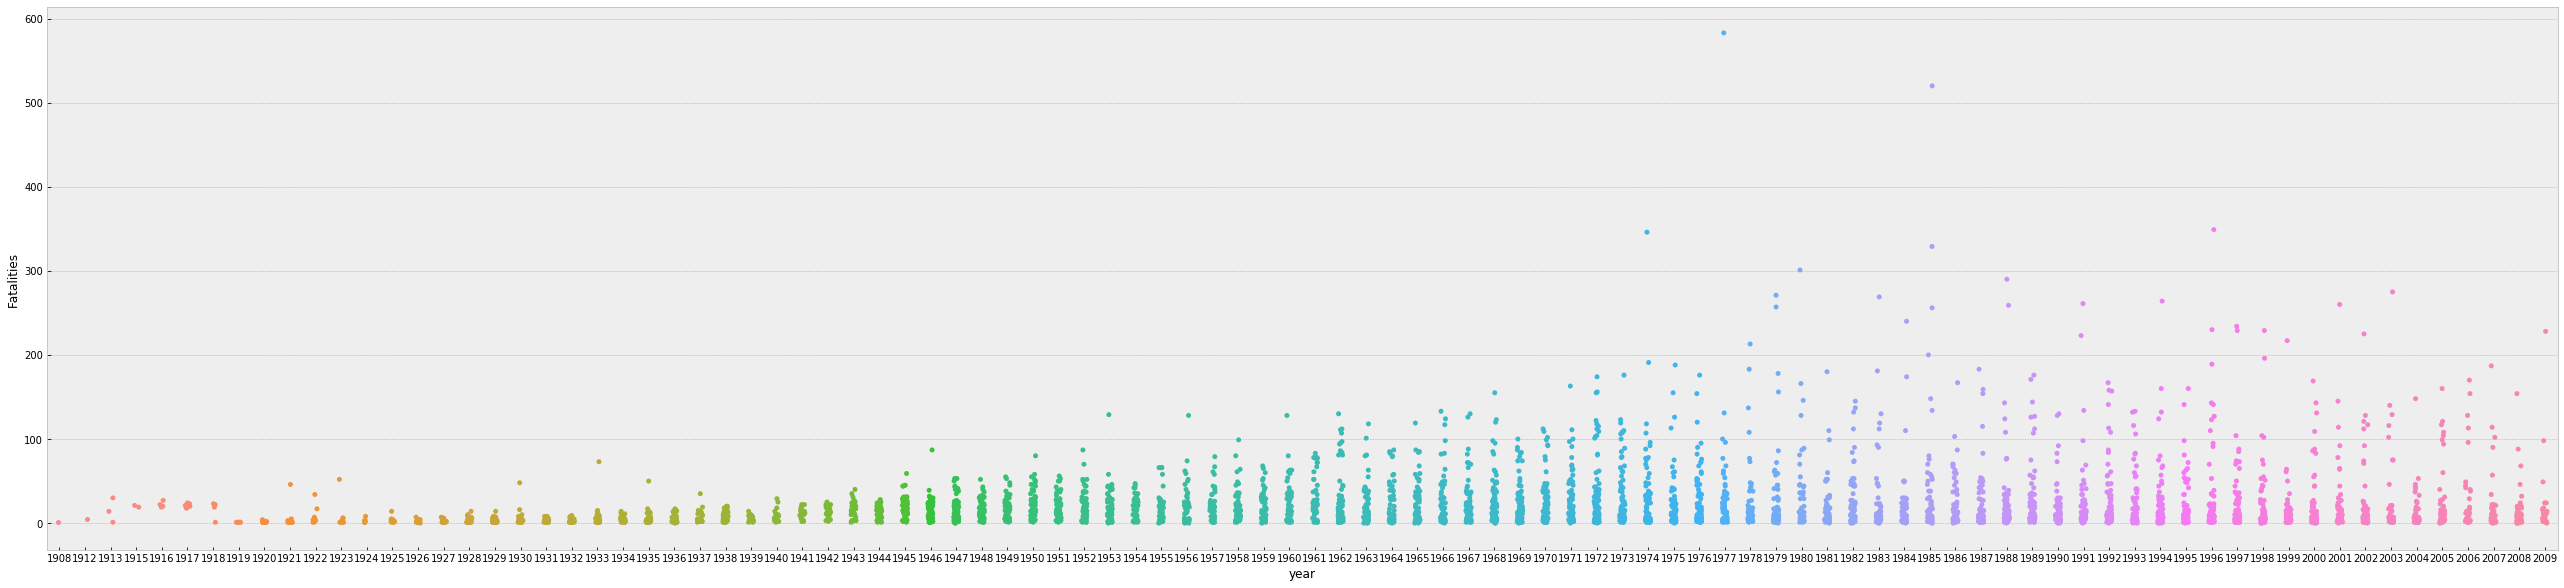

In [13]:
plt.figure(figsize=(45,10))
sns.stripplot('year','Fatalities',data=Data)

Text(0.5, 0, 'year')

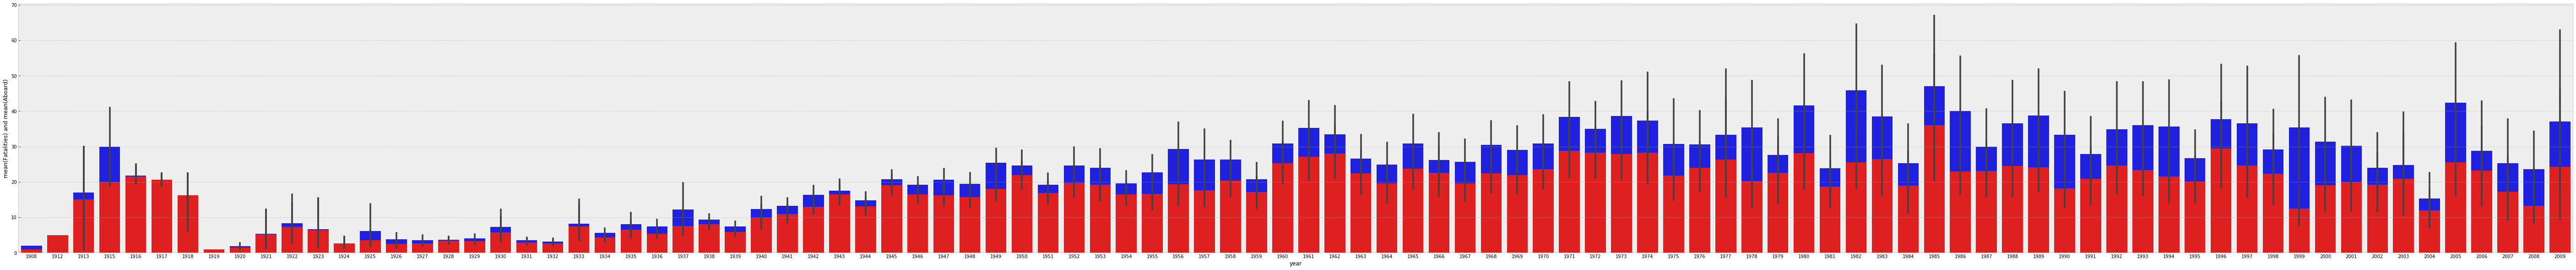

In [14]:
# Total Aboard and Fatalities plot - for each year
plt.figure(figsize=(100,10))

#Plot 1 - background - "total" (top) series
sns.barplot('year', 'Aboard',data=Data, color = "blue")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot('year', 'Fatalities',data=Data, color = "red")


bottom_plot.set_ylabel("mean(Fatalities) and mean(Aboard)")
bottom_plot.set_xlabel("year")

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib


from subprocess import check_output
print(check_output(["ls", "Airplane_Crashes_and_Fatalities_Since_1908.csv"]).decode("utf8"))

matplotlib.style.use('ggplot')

fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)

Airplane_Crashes_and_Fatalities_Since_1908.csv

Current size: [8, 6]


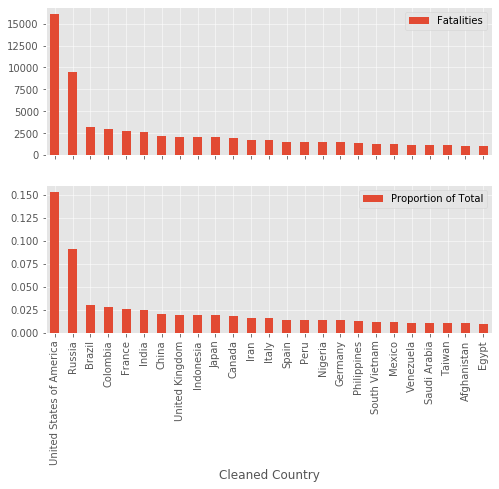

In [19]:
df = Data['Location'].str[0:].str.split(',', expand=True)
Data['Country'] = df[3].fillna(df[2]).fillna(df[1]).str.strip()
usNames = ['Virginia','New Jersey','Ohio','Pennsylvania', 'Maryland', 'Indiana', 'Iowa',
          'Illinois','Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY','California',
          'WY','New York','Oregon', 'Idaho', 'Connecticut','Nebraska', 'Minnesota', 'Kansas',
          'Texas', 'Tennessee', 'West Virginia', 'New Mexico', 'Washington', 'Massachusetts',
          'Utah', 'Ilinois','Florida', 'Michigan', 'Arkansas','Colorado', 'Georgia','Missouri',
          'Montana', 'Mississippi','Alaska','Jersey', 'Cailifornia', 'Oklahoma','North Carolina',
          'Kentucky','Delaware','D.C.','Arazona','Arizona','South Dekota','New Hampshire','Hawaii',
          'Washingon','Massachusett','Washington DC','Tennesee','Deleware','Louisiana',
          'Massachutes', 'Louisana', 'New York (Idlewild)','Oklohoma','North Dakota','Rhode Island',
          'Maine','Alakska','Wisconson','Calilfornia','Virginia','Virginia.','CA','Vermont',
          'HI','AK','IN','GA','Coloado','Airzona','Alabama','Alaksa' 
          ]

afNames = ['Afghanstan'] #Afghanistan
anNames = ['off Angola'] #Angola
ausNames = ['Qld. Australia','Queensland  Australia','Tasmania','off Australia'] #Australia
argNames = ['Aregntina'] #Argentina
azNames = ['Azores (Portugal)'] #Azores
baNames = ['Baangladesh'] #Bangladesh
bahNames = ['Great Inagua'] #Bahamas
berNames = ['off Bermuda'] #Bermuda
bolNames = ['Boliva','BO'] #Bolivia
bhNames = ['Bosnia-Herzegovina'] #Bosnia Herzegovina
bulNames = ['Bugaria','Bulgeria'] #Bulgaria
canNames = ['British Columbia', 'British Columbia Canada','Canada2',
            'Saskatchewan','Yukon Territory'] #Canada
camNames = ['Cameroons','French Cameroons'] #Cameroon
caNames = ['Cape Verde Islands'] #Cape Verde
chNames = ['Chili'] #Chile
coNames = ['Comoro Islands', 'Comoros Islands'] #Comoros
djNames = ['Djbouti','Republiof Djibouti'] #Djibouti
domNames = ['Domincan Republic', 'Dominica'] #Dominican Republic
drcNames = ['Belgian Congo','Belgian Congo (Zaire)','Belgium Congo'
           'DR Congo','DemocratiRepubliCogo','DemocratiRepubliCongo',
            'DemocratiRepubliof Congo','DemoctratiRepubliCongo','Zaire',
           'Zaïre'] #Democratic Republic of Congo
faNames = ['French Equitorial Africa'] #French Equatorial Africa
gerNames = ['East Germany','West Germany'] #Germany
grNames = ['Crete'] #Greece
haNames = ['Hati'] #Haiti
hunNames = ['Hunary'] #Hungary
inNames = ['Indian'] #India
indNames = ['Inodnesia','Netherlands Indies'] #Indonesia
jamNames = ['Jamacia'] #Jamaica
malNames = ['Malaya'] #Malaysia
manNames = ['Manmar'] #Myanmar
marNames = ['Mauretania'] #Mauritania
morNames = ['Morrocco','Morroco'] #Morocco
nedNames = ['Amsterdam','The Netherlands'] #Netherlands
niNames = ['Niger'] #Nigeria
philNames = ['Philipines','Philippine Sea', 'Phillipines',
            'off the Philippine island of Elalat'] #Philippines
romNames = ['Romainia'] #Romania
rusNames = ['Russian','Soviet Union','USSR'] #Russia
saNames = ['Saint Lucia Island'] #Saint Lucia
samNames = ['Western Samoa'] #Samoa
siNames = ['Sierre Leone'] #Sierra Leone
soNames = ['South Africa (Namibia)'] #South Africa
surNames = ['Suriname'] #Surinam
uaeNames = ['United Arab Emirates'] #UAE
ukNames = ['England', 'UK','Wales','110 miles West of Ireland'] #United Kingdom
uvNames = ['US Virgin Islands','Virgin Islands'] #U.S. Virgin Islands
wkNames = ['325 miles east of Wake Island']#Wake Island
yuNames = ['Yugosalvia'] #Yugoslavia
zimNames = ['Rhodesia', 'Rhodesia (Zimbabwe)'] #Zimbabwe

clnames = []
for country in Data['Country'].values:
    if country in afNames:
        clnames.append('Afghanistan')
    elif country in anNames:
        clnames.append('Angola')
    elif country in ausNames:
        clnames.append('Australia')
    elif country in argNames:
        clnames.append('Argentina')
    elif country in azNames:
        clnames.append('Azores')
    elif country in baNames:
        clnames.append('Bangladesh')
    elif country in bahNames:
        clnames.append('Bahamas')
    elif country in berNames:
        clnames.append('Bermuda')
    elif country in bolNames:
        clnames.append('Bolivia')
    elif country in bhNames:
        clnames.append('Bosnia Herzegovina')
    elif country in bulNames:
        clnames.append('Bulgaria')
    elif country in canNames:
        clnames.append('Canada')
    elif country in camNames:
        clnames.append('Cameroon')
    elif country in caNames:
        clnames.append('Cape Verde')
    elif country in chNames:
        clnames.append('Chile')
    elif country in coNames:
        clnames.append('Comoros')
    elif country in djNames:
        clnames.append('Djibouti')
    elif country in domNames:
        clnames.append('Dominican Republic')
    elif country in drcNames:
        clnames.append('Democratic Republic of Congo')
    elif country in faNames:
        clnames.append('French Equatorial Africa')
    elif country in gerNames:
        clnames.append('Germany')
    elif country in grNames:
        clnames.append('Greece')
    elif country in haNames:
        clnames.append('Haiti')
    elif country in hunNames:
        clnames.append('Hungary')
    elif country in inNames:
        clnames.append('India')
    elif country in jamNames:
        clnames.append('Jamaica')
    elif country in malNames:
        clnames.append('Malaysia')
    elif country in manNames:
        clnames.append('Myanmar')
    elif country in marNames:
        clnames.append('Mauritania')
    elif country in morNames:
        clnames.append('Morocco')
    elif country in nedNames:
        clnames.append('Netherlands')
    elif country in niNames:
        clnames.append('Nigeria')
    elif country in philNames:
        clnames.append('Philippines')
    elif country in romNames:
        clnames.append('Romania')
    elif country in rusNames:
        clnames.append('Russia')
    elif country in saNames:
        clnames.append('Saint Lucia')
    elif country in samNames:
        clnames.append('Samoa')
    elif country in siNames:
        clnames.append('Sierra Leone')
    elif country in soNames:
        clnames.append('South Africa')
    elif country in surNames:
        clnames.append('Surinam')
    elif country in uaeNames:
        clnames.append('UAE')
    elif country in ukNames:
        clnames.append('United Kingdom')
    elif country in usNames:
        clnames.append('United States of America')
    elif country in uvNames:
        clnames.append('U.S. Virgin Islands')
    elif country in wkNames:
        clnames.append('Wake Island')
    elif country in yuNames:
        clnames.append('Yugoslavia')
    elif country in zimNames:
        clnames.append('Zimbabwe')
    else:
        clnames.append(country)
        
Data['Cleaned Country'] = clnames        
fatalcountries = Data[['Fatalities','Cleaned Country']].groupby(['Cleaned Country']).agg('sum')
fatalcountries.reset_index(inplace = True)
operator = Data[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])
fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
totalfatal = fatalities.sum()
fatalcountries['Proportion of Total'] = fatalcountries['Fatalities']/totalfatal

fig_c, (ax1,ax2) = plt.subplots(2,1,sharex = True)
fatalcountries = fatalcountries.sort_values('Fatalities', ascending=False)
fatalcountries[fatalcountries['Fatalities']>1000].plot(x = 'Cleaned Country'
                                                     , y = 'Fatalities'
                                                     , ax = ax1
                                                     , kind = 'bar'
                                                     , grid = True)
fatalcountries[fatalcountries['Fatalities']>1000].plot(x = 'Cleaned Country'
                                                     , y = 'Proportion of Total'
                                                     , ax = ax2
                                                     , kind = 'bar'
                                                     , grid = True)

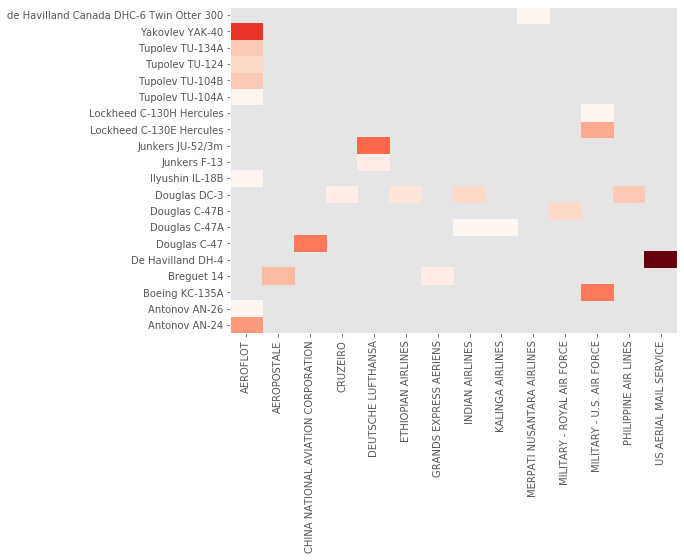

In [20]:
df = pd.DataFrame(Data[['Type','Operator']])
df = pd.DataFrame(data={'Type':df.groupby(['Type','Operator']).size().index.get_level_values('Type'),'Operator':df.groupby(['Type','Operator']).size().index.get_level_values('Operator'),'Count':df.groupby(['Type','Operator']).size()})
df = df.reset_index(drop=True)
df =df.sort_values('Count', ascending=False)
df = df[df['Count']>5].pivot(index='Type', columns='Operator', values='Count')
df = df.replace(to_replace='NaN', value=0)
plt.pcolor(df, cmap='Reds')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation='vertical')
plt.show()